<a href="https://colab.research.google.com/github/disha2101/1Stop_Internship_Codes/blob/main/Tensorflow_Illustration(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Formulation & Prediction

## Steps:


1.   Importing the Libraries
2.   Importing the dataset
3.    Splitting the dataset into training set and test set
4.   Training the model on training set
5.   Predicting the test set results
6.   Visualizing the Test Set Result



In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# to import the data set
mnist = tf.keras.datasets.mnist

In [3]:
#divide the dataset into training and test dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
print("x_train: " ,x_train)


print("y_train: ",y_train)

x_train:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
y_train:  [5 0 4 ... 5 6 8]


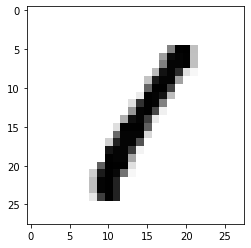

In [10]:
#for better visualization purpose we are using matplotlib library
plt.imshow(x_train[3],cmap=plt.cm.binary)
plt.show()

In [7]:
print(y_train[0])

5


In [13]:
#Normalize the training and test dataset
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [14]:
# How data looks after normalization?
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

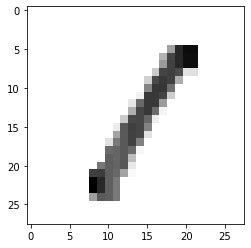

In [15]:
#after normalization
plt.imshow(x_train[3],cmap=plt.cm.binary)
plt.show()

In [16]:
#to create the sequential model-basic feedforward model
model = tf.keras.models.Sequential()

In [17]:
# convert the input into 1*784 from 28*28 by flatening
model.add(tf.keras.layers.Flatten())


In [18]:
# adding few layers 
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))

In [20]:
#output layer
model.add(tf.keras.layers.Dense(10,activation= tf.nn.softmax))


In [23]:
#compiler to train the model after creating it
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy']) 
#adam -default optimizer to start with

In [25]:
model.fit(x_train,y_train,epochs= 4)
#with every epochs accuracy increases

Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0556 - accuracy: 0.9825
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9862
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9900


In [26]:
val_loss,val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1255 - accuracy: 0.9694


In [27]:
#making predictions now and storing them in the variable named prediction
predictions = model.predict(x_test)

In [29]:
print(np.argmax(predictions[0]))

7


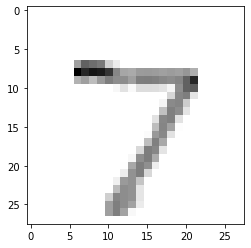

In [31]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [33]:
print(np.argmax(predictions[21]))
#changing the indices of predictions and playing

6


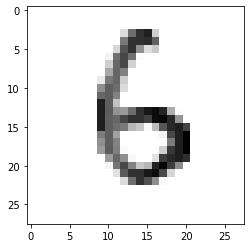

In [35]:
plt.imshow(x_test[21],cmap = plt.cm.binary)
plt.show()

In [39]:
print(np.argmax(predictions[4]))


4


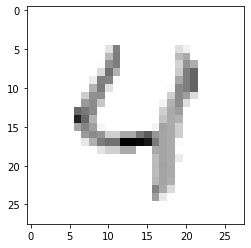

In [40]:
plt.imshow(x_test[4],cmap = plt.cm.binary)
plt.show()